In [40]:
# Importar las librerias o paquetes que necesitemos
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from ipywidgets import ColorPicker, VBox, interact, interactive, fixed
import struct
import ipyvolume as ipv
from pylab import *

In [2]:
dataset = pd.read_csv('data.csv', engine = 'c')

In [3]:
dataset.head(1)

,Power,I1,I2,I3,V1,V2,V3,V4,V5,V6,...,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48
0,9751.855054,7.82412,7.711217,7.659327,26.98123,26.98123,26.973406,26.98123,26.98123,26.98123,...,25.923836,25.923836,25.916177,25.923836,25.923836,25.923836,25.923836,25.916177,25.923836,25.923836


In [4]:
temporal_normal = dataset[dataset['Power'] > 9200]

temporal_normal = temporal_normal['Power']
shape = temporal_normal.shape
temporal_normal = pd.DataFrame(temporal_normal, columns= ['Power'])
print(f'el shape de la data es {shape}')
print(f' el tipo de estructura es  {type(temporal_normal)}')

el shape de la data es (1985,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>


In [5]:
def boxplotvalue(dataset):
    
    first_percentile = np.percentile(dataset, 25)
    third_percentile = np.percentile(dataset, 75)
    IRQ = third_percentile - first_percentile
    lower_limit = first_percentile - (1.5*IRQ)
    return lower_limit

def processingData(dataset, lower_limit, column):
    
    dataset['outlier'] = dataset[column].apply(lambda x : 1 if x < lower_limit else 0)
    
    return dataset

def preprocessing_normal(dataset, attr, attr2):
    temporal = dataset[dataset[attr] > 9200]
    temporal = temporal[attr2]
    shape = temporal.shape
    temporal = pd.DataFrame(temporal, columns= [attr2])
    print(f'el shape de la data es {shape}')
    print(f' el tipo de estructura es  {type(temporal)}')
    return temporal

def preprocessing_no_normal(dataset, attr, attr2):
    temporal = dataset[dataset[attr] < 9200]
    temporal = temporal[attr2]
    shape = temporal.shape
    temporal = pd.DataFrame(temporal, columns= [attr2])
    print(f'el shape de la data es {shape}')
    print(f' el tipo de estructura es  {type(temporal)}')
    return temporal
    

In [6]:
lower_limit =  boxplotvalue(temporal_normal)
print(f' el limite inferior es de  {lower_limit}')

 el limite inferior es de  9319.726327


In [19]:
dataset_eval_normal = processingData(temporal_normal, lower_limit,  'Power')
dataset_eval_normal.shape

(1985, 2)

In [8]:
def evaluation(dataset, eval= 'normal'):
    if eval == 'normal':
        try:
            normal = dataset.outlier.value_counts()[0]
            no_normal =  dataset.outlier.value_counts()[1]
        except:
            no_normal =  dataset.outlier.value_counts()[1]
            normal = 0
    
        return print(f' la cantidad de valores normales fueron {normal} y la cantidad de no normales es de {no_normal} para un acuracy de {(1-(no_normal/(normal+no_normal)))*100} %')
    else:
        try:
            normal = dataset.outlier.value_counts()[0]
            no_normal =  dataset.outlier.value_counts()[1]
        except:
            no_normal =  dataset.outlier.value_counts()[1]
            normal = 0
        return print(f' la cantidad de valores normales fueron {normal} y la cantidad de no normales es de {no_normal} para un acuracy de {(1-(normal/(normal+no_normal)))*100} %')
            

In [55]:
#### Esta es la evaluación en la data normal, aplicando boxplot con Power
evaluation(dataset_eval_normal)

 la cantidad de valores normales fueron 1980 y la cantidad de no normales es de 5 para un acuracy de 99.74811083123426 %


In [77]:
###### Ahora lo vamos a aplicar a la data no normal

dataset_no_normal = preprocessing_no_normal(dataset, 'Power', 'Power')
dataset_eval_no_normal = processingData(dataset_no_normal, lower_limit, 'Power')
evaluation(dataset_eval_no_normal, 'no_normal')

el shape de la data es (2493,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>
 la cantidad de valores normales fueron 0 y la cantidad de no normales es de 2493 para un acuracy de 100.0 %


In [78]:
### Lo mismo para I1
dataset_normal_I1 = preprocessing_normal(dataset, 'Power', 'I1')
lower_limit_I1 = boxplotvalue(dataset_normal_I1)
dataset_eval_normal_I1 = processingData(dataset_normal_I1, lower_limit_I1, 'I1')
evaluation(dataset_eval_normal_I1)


el shape de la data es (1985,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>
 la cantidad de valores normales fueron 1981 y la cantidad de no normales es de 4 para un acuracy de 99.7984886649874 %


In [79]:
dataset_no_normal_I1 = preprocessing_no_normal(dataset, 'Power', 'I1')
dataset_eval_no_normal_I1 = processingData(dataset_no_normal_I1, lower_limit_I1, 'I1')
evaluation(dataset_eval_no_normal_I1, 'no_normal')

el shape de la data es (2493,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>
 la cantidad de valores normales fueron 1659 y la cantidad de no normales es de 834 para un acuracy de 33.45367027677497 %


In [64]:
### Lo mismo para I2
dataset_normal_I2 = preprocessing_normal(dataset, 'Power', 'I2')
lower_limit_I2 = boxplotvalue(dataset_normal_I2)
dataset_eval_normal_I2 = processingData(dataset_normal_I2, lower_limit_I2, 'I2')
evaluation(dataset_eval_normal_I2)

el shape de la data es (1985,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>
 la cantidad de valores normales fueron 1953 y la cantidad de no normales es de 32 para un acuracy de 98.38790931989925 %


In [66]:
dataset_no_normal_I2 = preprocessing_no_normal(dataset, 'Power', 'I2')
dataset_eval_no_normal_I2 = processingData(dataset_no_normal_I2, lower_limit_I2, 'I2')
evaluation(dataset_eval_no_normal_I2, 'no_normal')

el shape de la data es (2493,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>
 la cantidad de valores normales fueron 1961 y la cantidad de no normales es de 532 para un acuracy de 21.339751303650225 %


In [71]:
### Lo mismo para I3
dataset_normal_I3 = preprocessing_normal(dataset, 'Power', 'I3')
lower_limit_I3 = boxplotvalue(dataset_normal_I3)
dataset_eval_normal_I3 = processingData(dataset_normal_I3, lower_limit_I3, 'I3')
evaluation(dataset_eval_normal_I3)

el shape de la data es (1985,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>
 la cantidad de valores normales fueron 1975 y la cantidad de no normales es de 10 para un acuracy de 99.49622166246851 %


In [88]:
dataset_no_normal_I3 = preprocessing_no_normal(dataset, 'Power', 'I3')
dataset_eval_no_normal_I3 = processingData(dataset_no_normal_I3, lower_limit_I3, 'I3')
evaluation(dataset_eval_no_normal_I3, 'no_normal')

el shape de la data es (2493,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>
 la cantidad de valores normales fueron 1356 y la cantidad de no normales es de 1137 para un acuracy de 45.607701564380264 %


In [89]:
### aqui plotea alito

In [90]:
def plotting_boxplot(dataset, lower_limit, column):
    lower_limit_plot = np.empty(dataset.shape[0])
    lower_limit_plot.fill(lower_limit)
    lower_limit_plot
    series = dataset[column].to_numpy()
    x = dataset[column].index.to_numpy()

    p1, p2 = plot(x, lower_limit_plot, x, series)

    legend(('Lower Limit', 'Real Data'),
    prop = {'size': 10}, loc='upper right')

    xlabel('Metricas')
    ylabel('Numeros')
    title('Boxplot')

# Creo una figura (ventana), pero indico el tamaño (x,y) en pulgadas
    figure(figsize=(12, 5))

    show()


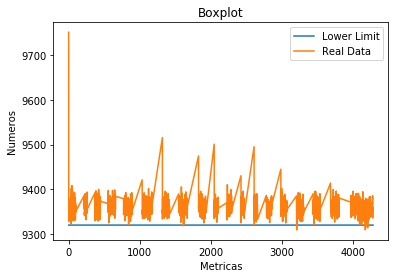

<Figure size 864x360 with 0 Axes>

La evaluación de power se ve muy buena para la data normal


In [91]:
plotting_boxplot(dataset_eval_normal,lower_limit, 'Power')

print("La evaluación de power se ve muy buena para la data normal")

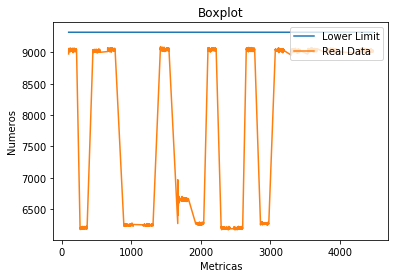

<Figure size 864x360 with 0 Axes>

La evaluación de power se ve muy buena para la data no normal


In [92]:
plotting_boxplot(dataset_eval_no_normal,lower_limit, 'Power')
print("La evaluación de power se ve muy buena para la data no normal")

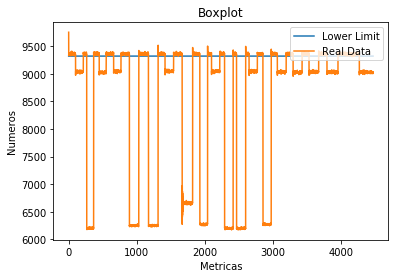

<Figure size 864x360 with 0 Axes>

La evaluación de power se ve muy buena para la data combinada


In [95]:
plotting_boxplot(dataset,lower_limit, 'Power')
print("La evaluación de power se ve muy buena para la data combinada")

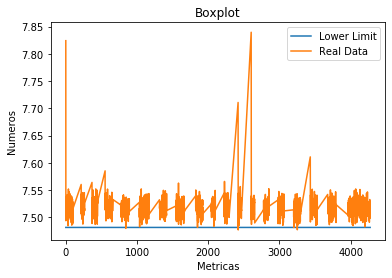

<Figure size 864x360 with 0 Axes>

La evaluación de I1 se ve muy buena para la data normal


In [93]:
plotting_boxplot(dataset_eval_normal_I1,lower_limit_I1, 'I1')
print("La evaluación de I1 se ve muy buena para la data normal")

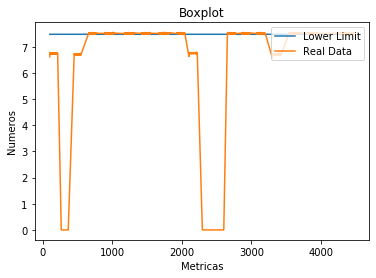

<Figure size 864x360 with 0 Axes>

La evaluación de I1 para la data no normal no se ve tan bien, de hecho solo tiene el 33% de accuracy


In [94]:
plotting_boxplot(dataset_eval_no_normal_I1,lower_limit_I1, 'I1')
print("La evaluación de I1 para la data no normal no se ve tan bien, de hecho solo tiene el 33% de accuracy")